# REDA Example Notebook

## Setup

In [1]:
# In case you want to try the newest version from git.
# Please be aware that this may break this notebook
# !pip install git+git://github.com/geophysics-ubonn/reda

In [2]:
import pandas as pd
pd.set_option('display.width', 1000)

%matplotlib inline
import reda.utils.mpl
plt, mpl = reda.utils.mpl.setup()

import numpy as np
np.random.seed(2017)

from glob import glob

## Usage of reda

In [3]:
# get list of data files
data_files = sorted(glob('data/pygimli_*.ohm'))
# take only each tenth data file
data_files = data_files[0:-1:10]


In [18]:
from reda import ERT

obj = ERT()

for nr, filename in enumerate(data_files):
    obj.import_bert(filename, timestep=nr)
  
obj.compute_K_analytical(spacing=1)

Calculating resistance from apparent resistivity and geometric factors. (R = rhoa_/K)
generating ids
assigning ids
Calculating resistance from apparent resistivity and geometric factors. (R = rhoa_/K)
generating ids
assigning ids
Calculating resistance from apparent resistivity and geometric factors. (R = rhoa_/K)
generating ids
assigning ids
Calculating resistance from apparent resistivity and geometric factors. (R = rhoa_/K)
generating ids
assigning ids
Calculating resistance from apparent resistivity and geometric factors. (R = rhoa_/K)
generating ids
assigning ids
Calculating resistance from apparent resistivity and geometric factors. (R = rhoa_/K)
generating ids
assigning ids
Calculating resistance from apparent resistivity and geometric factors. (R = rhoa_/K)
generating ids
assigning ids
Calculating resistance from apparent resistivity and geometric factors. (R = rhoa_/K)
generating ids
assigning ids
Calculating resistance from apparent resistivity and geometric factors. (R = rho

In [5]:
# hack together reciprocals
import pandas as pd
data_rec = obj.data.values
dfr = pd.DataFrame(
    np.hstack((data_rec[:, 2:4], data_rec[:, 0:2], data_rec[:, 4:])),
    columns=obj.data.columns
)

# need to set the data types accordingly
for key, dtype in obj.data.dtypes.items():
    dfr[key] = dfr[key].astype(dtype)

print(dfr.head(5))

# add some noise
dfr['rho_a'] = dfr['rho_a'] + 0.05 * dfr['rho_a'].values * np.random.randn(dfr.shape[0])
obj.data = pd.concat((obj.data, dfr))

   a  b  m  n           k          r       rho_a  timestep  valid  id norrec   sigma_a
0  4  3  1  2   18.849556  16.660311  314.039461         0    1.0   0    nor  0.060023
1  5  4  1  2   75.398224   4.241190  319.778194         0    1.0   1    nor  0.235783
2  6  5  1  2  188.495559   1.662108  313.299886         0    1.0   2    nor  0.601646
3  7  6  1  2  376.991118   0.813218  306.575992         0    1.0   3    nor  1.229682
4  8  7  1  2  659.734457   0.449058  296.259105         0    1.0   4    nor  2.226883


In [6]:
print(obj.data.head(10))

   a  b   m   n            k          r       rho_a  timestep  valid  id norrec    sigma_a
0  1  2   4   3    18.849556  16.660311  314.039461         0    1.0   0    nor   0.060023
1  1  2   5   4    75.398224   4.241190  319.778194         0    1.0   1    nor   0.235783
2  1  2   6   5   188.495559   1.662108  313.299886         0    1.0   2    nor   0.601646
3  1  2   7   6   376.991118   0.813218  306.575992         0    1.0   3    nor   1.229682
4  1  2   8   7   659.734457   0.449058  296.259105         0    1.0   4    nor   2.226883
5  1  2   9   8  1055.575132   0.274267  289.509467         0    1.0   5    nor   3.646082
6  1  2  10   9  1583.362697   0.178931  283.312170         0    1.0   6    nor   5.588756
7  1  2  11  10  2261.946711   0.121960  275.867204         0    1.0   7    nor   8.199404
8  1  2  12  11  3110.176727   0.086760  269.838138         0    1.0   8    nor  11.526083
9  1  2  13  12  4146.902303   0.063809  264.608515         0    1.0   9    nor  15.671840

In [7]:
# these timesteps where imported
print(obj.data.groupby('timestep').groups.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## Filtering data

In [8]:
# apply to all timesteps
# obj.filter('K > 1000')

In [9]:
# apply only to timestep 10
obj.sub_filter(
    'timestep in [3, 7]',
    'a > 10 and a < 20 and k > 1000',    
)

In [10]:
print(obj.data.query('timestep == 3 and rho_a < 200'))

       a   b   m   n              k         r       rho_a  timestep  valid   id norrec        sigma_a
2227   1   2   8   7     659.734457  0.289292  190.855950         3    1.0    4    nor       3.456714
2228   1   2   9   8    1055.575132  0.124387  131.299422         3    1.0    5    nor       8.039450
2229   1   2  10   9    1583.362697  0.053796   85.178704         3    1.0    6    nor      18.588716
2230   1   2  11  10    2261.946711  0.022858   51.703278         3    1.0    7    nor      43.748613
2231   1   2  12  11    3110.176727  0.009497   29.537502         3    1.0    8    nor     105.295861
2232   1   2  13  12    4146.902303  0.003632   15.061481         3    1.0    9    nor     275.331638
2233   1   2  14  13    5390.972994  0.001309    7.057056         3    1.0   10    nor     763.912497
2234   1   2  15  14    6861.238355  0.000478    3.278835         3    1.0   11    nor    2092.584411
2235   1   2  16  15    8576.547944  0.000181    1.552920         3    1.0   12   

## Histogram plotting

In [11]:
obj.data.dtypes

a             int64
b             int64
m             int64
n             int64
k           float64
r           float64
rho_a       float64
timestep      int64
valid       float64
id            int64
norrec       object
sigma_a     float64
dtype: object

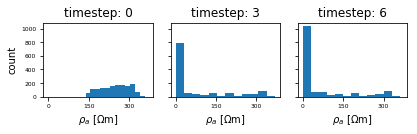

In [12]:
import reda.plotters.histograms as RH
fig = RH.plot_histograms_extra_dims(
    obj,
    keys=['rho_a', ],
    extra_dims=['timestep', ],
    Nx=5,
    #subquery='timestep in {0}'.format(list(range(0, 100, 10))),
    subquery='timestep in [0, 3, 6]'
)
# print(fig.get_figwidth(), fig.get_figheight())
fig.savefig('histogram.png', dpi=300)

## Plotting Pseudosections

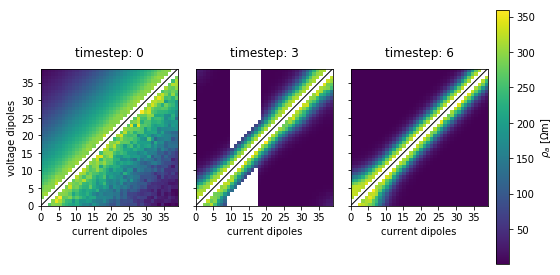

In [13]:
import reda.plotters.pseudoplots as PS
fig = PS.plot_ps_extra(
    obj, 'rho_a',
    subquery='timestep in [0, 3, 6]'
)
fig.set_size_inches(7.87, 3.93)
fig.tight_layout()
fig.savefig('pseudoplots.png', dpi=600)

## Analyzing time series

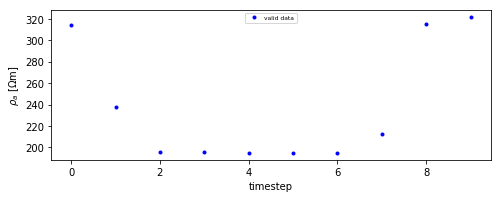

In [14]:
import reda.plotters.time_series as TS

fig, ax = TS.plot_quadpole_evolution(
    obj,
    [10, 11, 15, 14],
    'rho_a',
    threshold=0.05,
    rolling=False,
)

In [15]:
# add some noise to the data
import numpy as np
np.random.seed(2017)
obj.data['rho_a'] = obj.data['rho_a'] + (np.abs(obj.data['rho_a'] * 0.05 * np.random.randn(obj.data.shape[0])))

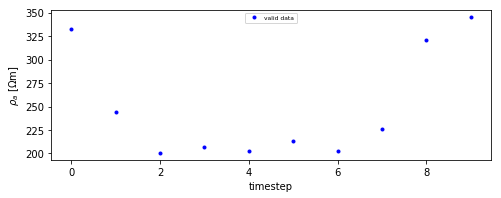

In [16]:
fig, ax = TS.plot_quadpole_evolution(
    obj,
    [10, 11, 15, 14],
    'rho_a',
    threshold=0.05,
    rolling=False,
)

## The Data Journal

In [17]:
obj.print_data_journal()


--- Data Journal Start ---
2019-01-29 12:02:25.319530
Data was imported from file pygimli_paper_data000.ohm (741 data points)
Data was imported from file pygimli_paper_data010.ohm (741 data points)
Data was imported from file pygimli_paper_data020.ohm (741 data points)
Data was imported from file pygimli_paper_data030.ohm (741 data points)
Data was imported from file pygimli_paper_data040.ohm (741 data points)
Data was imported from file pygimli_paper_data050.ohm (741 data points)
Data was imported from file pygimli_paper_data060.ohm (741 data points)
Data was imported from file pygimli_paper_data070.ohm (741 data points)
Data was imported from file pygimli_paper_data080.ohm (741 data points)
Data was imported from file pygimli_paper_data090.ohm (741 data points)
A filter was applied with query "a > 10 and a < 20 and k > 1000". In total 468 records were removed
--- Data Journal End ---

